In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

In [2]:
imsize=128
seed=4
tf.config.experimental.enable_op_determinism()
tf.random.set_seed(seed)
tf.keras.utils.set_random_seed(seed)
tf.keras.initializers.GlorotNormal(seed)

model_folder='Model/Fe_vs_NM'

In [3]:
#Loading augmented data generated by datagen_fe_vs_fi.ipynb
train_test_split_dir='Data_Preprocessing/training_data_numpy_format/Fe_NM'
trainX=np.load(train_test_split_dir+'/trainX.npy')
trainY=np.load(train_test_split_dir+'/trainY.npy')
valX =np.load(train_test_split_dir+'/valX.npy')
valY =np.load(train_test_split_dir+'/valY.npy')

In [4]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding="same", input_shape=(imsize, imsize, 1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding="same"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Conv2D(8, (3,3), activation='relu', padding="same"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))

model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

d:\projects\cnn-mp-dos\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 8)      │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        65,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,409 (314.10 KB)

 Trainable params: 80,233 (313.41 KB)

 Non-trainable params: 176 (704.00 B)

In [5]:
model_filename = model_folder+'/CNN_Binary_F_NM_{epoch}.keras'

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath = model_filename,
    monitor='val_loss',
    verbose=0,
    save_best_only=True,
    save_weights_only=False,
    mode='min',
    save_freq='epoch',
    initial_value_threshold=None
)

In [6]:
model.compile(optimizer = "Adam", loss="binary_crossentropy", metrics=["accuracy"])

In [7]:
history = model.fit(trainX,trainY, epochs=50, validation_data=(valX,valY), callbacks=[model_checkpoint])

Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 12s 173ms/step - accuracy: 0.5672 - loss: 0.7772 - val_accuracy: 0.4801 - val_loss: 0.7211
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 168ms/step - accuracy: 0.7563 - loss: 0.5066 - val_accuracy: 0.4801 - val_loss: 0.8767
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 168ms/step - accuracy: 0.8069 - loss: 0.4008 - val_accuracy: 0.4801 - val_loss: 1.2451
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 171ms/step - accuracy: 0.8533 - loss: 0.3207 - val_accuracy: 0.4801 - val_loss: 1.5910
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 185ms/step - accuracy: 0.8786 - loss: 0.2773 - val_accuracy: 0.4801 - val_loss: 2.4879
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 171ms/step - accuracy: 0.9139 - loss: 0.2258 - val_accuracy: 0.4835 - val_loss: 2.8713
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 170ms/step - accuracy: 0.9391 - loss: 0.1528 - val_accuracy: 0.4939 - val_loss: 2.1735
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 168ms/step - accuracy: 0.9522 - loss: 0.1442 - val_accuracy: 

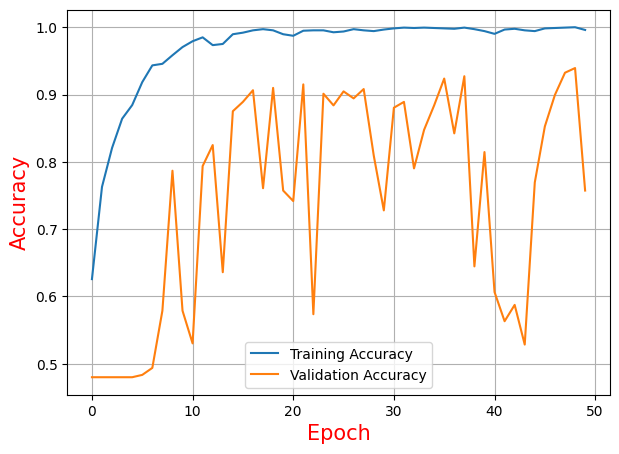

In [8]:
plt.subplots(figsize=(7, 5));
plt.plot(history.history['accuracy']);
plt.plot(history.history['val_accuracy']);
plt.ylabel('Accuracy', color='red', fontsize = 15);
plt.xlabel('Epoch', color='red', fontsize = 15);
plt.legend(['Training Accuracy', 'Validation Accuracy']);
plt.grid()

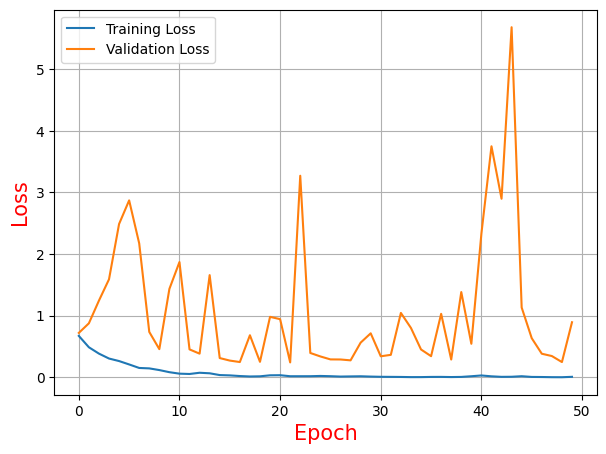

In [9]:
plt.subplots(figsize=(7, 5));
plt.plot(history.history['loss']);
plt.plot(history.history['val_loss']);
plt.ylabel('Loss', color='red', fontsize = 15);
plt.xlabel('Epoch', color='red', fontsize = 15);
plt.legend(['Training Loss', 'Validation Loss']);
plt.grid()

*MODEL EVALUATION using TESTING DATA (randomly transformed by Imagedatagenerator)* 

In [10]:
import re
#Selecting BEST MODEL (BEST ACCURACY)
model_folder='Model/Fe_vs_NM'
LABELS=['Ferromagnetic', 'Non_Magnetic']
dir_list = os.listdir(model_folder)
best_epoch=-1
best_model=''
acc_max=-1
actual_class = valY
for filename in dir_list:
    # print(filename)
    model_check = tf.keras.models.load_model(model_folder+'/'+filename)
    predicted_class =((model_check.predict(valX) > .5).astype(int))
    report=classification_report(actual_class, predicted_class, target_names=LABELS,output_dict=True,zero_division=np.nan)
    if report['accuracy']>acc_max:
        best_model=model_folder+'/'+filename
        r=re.findall('[0-9]+', filename)
        best_epoch=int(r[0])
        acc_max=report['accuracy']

model_eval = tf.keras.models.load_model(best_model)
predicted_class =((model_eval.predict(valX) > .5).astype(int))

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


In [11]:
report=classification_report(actual_class, predicted_class, target_names=['Ferromagnetic', 'Non_Magnetic'])
print('Best model: ', best_model)
print('=======================================================')
print(report)

Best model:  Model/Fe_vs_NM/CNN_Binary_F_NM_22.keras
               precision    recall  f1-score   support

Ferromagnetic       0.96      0.86      0.91       277
 Non_Magnetic       0.88      0.96      0.92       300

     accuracy                           0.92       577
    macro avg       0.92      0.91      0.91       577
 weighted avg       0.92      0.92      0.91       577



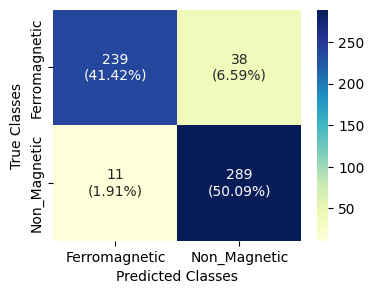

In [12]:
cf_mtx = confusion_matrix(actual_class, predicted_class)

group_counts = ["{0:0.0f}".format(value) for value in cf_mtx.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_mtx.flatten()/np.sum(cf_mtx)]
box_labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_counts, group_percentages)]
box_labels = np.asarray(box_labels).reshape(2,2)

plt.figure(figsize = (4, 3))
sns.heatmap(cf_mtx, xticklabels=LABELS, yticklabels=LABELS,
           cmap="YlGnBu", fmt="", annot=box_labels)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()

*TRAINING AND VALIDATION ACCURACY*

In [13]:
print(f'Best_epoch: {best_epoch}')
print(f"Training Acc: {history.history['accuracy'][best_epoch]}")
print(f"Validation Acc: {history.history['val_accuracy'][best_epoch]}")

print(f"Training Loss: {history.history['loss'][best_epoch]}")
print(f"Validation Loss: {history.history['val_loss'][best_epoch]}")



Best_epoch: 22
Training Acc: 0.9953730702400208
Validation Acc: 0.5736568570137024
Training Loss: 0.01810556650161743
Validation Loss: 3.2710328102111816


Testing Model with ORIGINAL DOS Images

In [14]:
#NO DATA transformation by this function
def generate_test_data(DataLocation,TransformedDataLocation,batch_size,target_size):
    datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.)
    data_all = datagen.flow_from_directory(DataLocation , 
                                            target_size=(target_size,target_size), #Resizing
                                            batch_size= batch_size,
                                            class_mode='binary',
                                            save_to_dir=TransformedDataLocation)
    
    for image in data_all:
            break
    print(f'{len(os.listdir(TransformedDataLocation)) } randomly transformed data located in {TransformedDataLocation}')
    return data_all

In [20]:
target_size=128

source_dir='Data_Preprocessing/data_split_original/testing_data/Fe_NM/class_fe' 
dir_list = os.listdir(source_dir)
num_file=[]
for folder in dir_list:
    file_list=os.listdir(source_dir+'/'+folder)
    num_file=len(file_list)
save_dir_test_data1='Data_Preprocessing/data_by_imagedatagenerator/testing_data/Ferromagnetic'
generate_test_data(source_dir,save_dir_test_data1,num_file,target_size)

Found 28 images belonging to 1 classes.
28 randomly transformed data located in Data_Preprocessing/data_by_imagedatagenerator/testing_data/Ferromagnetic


In [21]:
source_dir='Data_Preprocessing/data_split_original/testing_data/Fe_NM/class_nm' 
dir_list = os.listdir(source_dir)
num_file=[]
for folder in dir_list:
    file_list=os.listdir(source_dir+'/'+folder)
    num_file=len(file_list)
save_dir_test_data2='Data_Preprocessing/data_by_imagedatagenerator/testing_data/Non_Magnetic'
generate_test_data(source_dir,save_dir_test_data2,num_file,target_size)

Found 31 images belonging to 1 classes.


31 randomly transformed data located in Data_Preprocessing/data_by_imagedatagenerator/testing_data/Non_Magnetic


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Best model:  Model/Fe_vs_NM/CNN_Binary_F_NM_22.keras
               precision    recall  f1-score   support

Ferromagnetic       0.79      0.68      0.73        28
 Non_Magnetic       0.74      0.84      0.79        31

     accuracy                           0.76        59
    macro avg       0.77      0.76      0.76        59
 weighted avg       0.77      0.76      0.76        59



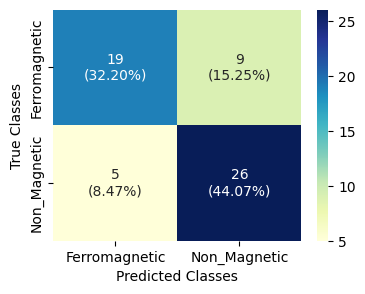

In [22]:
import cv2
from numpy import random

path_test=save_dir_test_data1
dir_list = os.listdir(path_test)
data=[]
actual_class=[]
all_filename=[]
for filename in dir_list:
    imagepath=path_test+'/'+filename
    image = cv2.imread(imagepath,cv2.IMREAD_GRAYSCALE)    
    image=cv2.resize(image,(target_size,target_size)) 
    data.append(image)
    actual_class.append([0])
    all_filename.append(filename)

path_test=save_dir_test_data2
dir_list = os.listdir(path_test)
for filename in dir_list:
    imagepath=path_test+'/'+filename
    image = cv2.imread(imagepath,cv2.IMREAD_GRAYSCALE) 
    image=cv2.resize(image,(target_size,target_size)) 
    data.append(image)
    actual_class.append([1])
    all_filename.append(filename)

actual_class=np.array(actual_class,dtype=int)

all_test_data=np.array(data, dtype="float") / 255.0
all_test_data=all_test_data.reshape(all_test_data.shape[0],target_size,target_size,1)

predicted_out=((model_eval.predict(all_test_data) > .5).astype(int))

report=classification_report(actual_class, predicted_out, target_names=['Ferromagnetic', 'Non_Magnetic'])
print('Best model: ', best_model)
print('=======================================================')
print(report)

cf_mtx = confusion_matrix(actual_class, predicted_out)

group_counts = ["{0:0.0f}".format(value) for value in cf_mtx.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_mtx.flatten()/np.sum(cf_mtx)]
box_labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_counts, group_percentages)]
box_labels = np.asarray(box_labels).reshape(2,2)

plt.figure(figsize = (4, 3))
sns.heatmap(cf_mtx, xticklabels=LABELS, yticklabels=LABELS,
           cmap="YlGnBu", fmt="", annot=box_labels)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()

In [92]:
window_name = all_filename[11]
path_img=f"{save_dir_test_data1}/{all_filename[11]}"
print(path_img)
image = cv2.imread(path_img,cv2.IMREAD_GRAYSCALE)
cv2.imshow(window_name,image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Data_Preprocessing/data_all/Fe_NM/testing_data/Ferromagnetic/_10_7231297.png
